# Capstone Project 1 - Inferential Statistics

In [2]:
%store -r
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set(color_codes=True)
sns.set_context("talk")

## Flights

In [3]:
#show flights dataframe
print(flights.info())
flights.head()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1824403 entries, (ABE-ATL, 2016-01-01 07:00:00) to (YUM-PHX, 2016-12-31 19:15:00)
Data columns (total 39 columns):
quarter                  int64
month                    int64
day_of_month             int64
day_of_week              int64
fl_date                  object
Day_of_Week              object
Month                    object
dt_index                 datetime64[ns]
hour_of_day              object
unique_carrier           object
fl_num                   int64
origin_airport_id        int64
origin_city_market_id    int64
origin                   object
origin_city_name         object
origin_state_abr         object
origin_state_nm          object
dest_airport_id          int64
dest_city_market_id      int64
dest                     object
dest_city_name           object
dest_state_abr           object
dest_state_nm            object
link                     object
unique_carrier_nm        object
crs_dep_time             int64
dep_t

quarter  month  day_of_month  day_of_week  \
link    dt_index                                                         
ABE-ATL 2016-01-01 07:00:00        1      1             1            5   
        2016-01-01 16:09:00        1      1             1            5   
        2016-01-02 06:00:00        1      1             2            6   
        2016-01-02 16:12:00        1      1             2            6   
        2016-01-03 05:57:00        1      1             3            7   

                                fl_date Day_of_Week    Month  \
link    dt_index                                               
ABE-ATL 2016-01-01 07:00:00  2016-01-01      Friday  January   
        2016-01-01 16:09:00  2016-01-01      Friday  January   
        2016-01-02 06:00:00  2016-01-02    Saturday  January   
        2016-01-02 16:12:00  2016-01-02    Saturday  January   
        2016-01-03 05:57:00  2016-01-03      Sunday  January   

                                       dt_index hour_of_day unique_carrier  \
link    dt_index                                                             
ABE-ATL 2016-01-01 07:00:00 2016-01-01 07:00:00       07:00             EV   
        2016-01-01 16:09:00 2016-01-01 16:09:00       16:00             EV   
        2016-01-02 06:00:00 2016-01-02 06:00:00       06:00             EV   
        2016-01-02 16:12:00 2016-01-02 16:12:00       16:00             EV   
        2016-01-03 05:57:00 2016-01-03 05:57:00       05:00             EV   

                              ...     wheels_on  taxi_in  crs_arr_time  \
link    dt_index              ...                                        
ABE-ATL 2016-01-01 07:00:00   ...         900.0      7.0           845   
        2016-01-01 16:09:00   ...        1812.0      5.0          1828   
        2016-01-02 06:00:00   ...         753.0      6.0           812   
        2016-01-02 16:12:00   ...        1800.0      7.0          1827   
        2016-01-03 05:57:00   ...         753.0      5.0           813   

                            arr_time arr_deviation arr_delay crs_elapsed_time  \
link    dt_index                                                                
ABE-ATL 2016-01-01 07:00:00    907.0          22.0      22.0            135.0   
        2016-01-01 16:09:00   1817.0         -11.0       0.0            138.0   
        2016-01-02 06:00:00    759.0         -13.0       0.0            132.0   
        2016-01-02 16:12:00   1807.0         -20.0       0.0            137.0   
        2016-01-03 05:57:00    758.0         -15.0       0.0            133.0   

                             actual_elapsed_time  air_time distance  
link    dt_index                                                     
ABE-ATL 2016-01-01 07:00:00                127.0     111.0    692.0  
        2016-01-01 16:09:00                128.0     115.0    692.0  
        2016-01-02 06:00:00                119.0     101.0    692.0  
        2016-01-02 16:12:00                115.0      98.0    692.0  
        2016-01-03 05:57:00                121.0     107.0    692.0  

[5 rows x 39 columns]

##### Test for Normality and CLT in Target Variables

<div class="span5 alert alert-success">
<p>**Target Variables**</p>
<p>dep_deviation: deviation from the actual departure time to the scheduled (CRS) departure time</p>
<p>arr_deviation: deviation from the actual arrival time to the  scheduled (CRS) arrival time</p>
<p>distance: distance from the origin airport to the destination airport</p>
</div>

Sample Size:  1824403


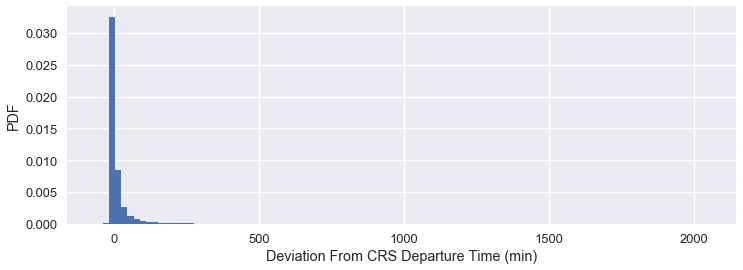

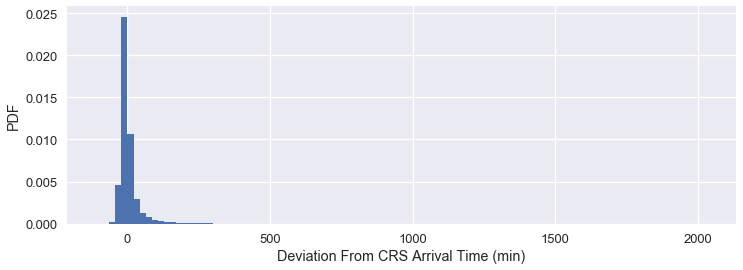

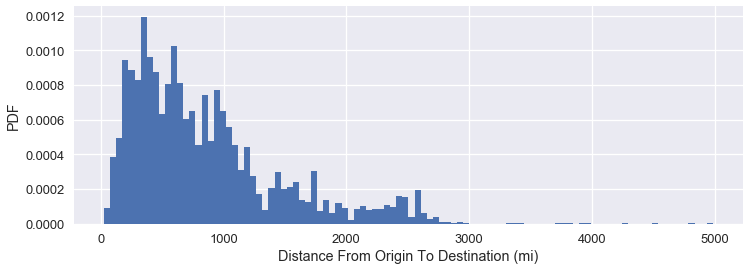

In [48]:
#check sample size 
print('Sample Size: ', len(flights))

#define function to plot probabilty density function
def pdf_plot(series, name):
    fig, ax = plt.subplots(figsize=(12,4))
    ax.hist(series, bins=100, density=True, histtype='stepfilled')
    ax.set(xlabel=name, ylabel='PDF')

#plot pdf for each variable of interest
pdf_plot(flights.dep_deviation, 'Deviation From CRS Departure Time (min)')
pdf_plot(flights.arr_deviation, 'Deviation From CRS Arrival Time (min)')
pdf_plot(flights.distance, 'Distance From Origin To Destination (mi)')

<div class="span5 alert alert-success">
<p>Central Limit Theorem applies as sample size is very large and the probability density function of each variable shows observations are independent</p>
</div>

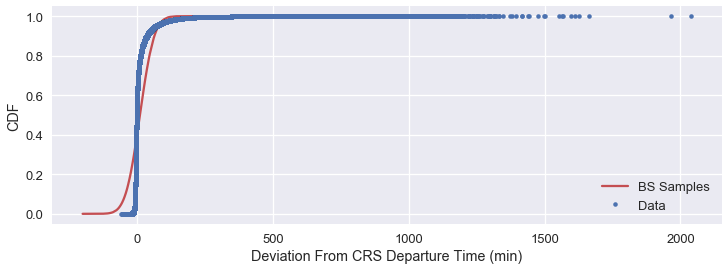

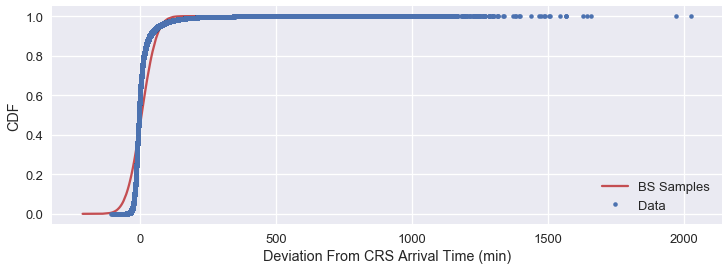

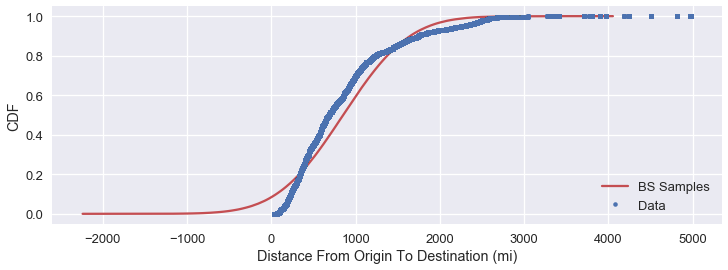

In [40]:
#define function for plotting cdf and ecdf
def cdf_plot(series, name):
    mean = series.mean()
    std = series.std()
    samples = np.random.normal(mean, std, size=len(series))
    def ecdf(data):
        n = len(data)
        x = np.sort(data)
        y = np.arange(1, n+1) / n
        return x, y
    x_theor, y_theor = ecdf(samples)
    x, y = ecdf(series)
    fig, ax = plt.subplots(figsize=(12,4))
    ax.plot(x_theor, y_theor, color='r')
    ax.plot(x, y, marker='.', linestyle='none')
    ax.set(xlabel=name, ylabel='CDF')
    ax.legend(('BS Samples', 'Data'), loc='lower right')
    plt.show()

#show cdf and ecdf for departure and arrival deviation delay
cdf_plot(flights.dep_deviation, 'Deviation From CRS Departure Time (min)')
cdf_plot(flights.arr_deviation, 'Deviation From CRS Arrival Time (min)')
cdf_plot(flights.distance, 'Distance From Origin To Destination (mi)')

<div class="span5 alert alert-success">
<p>The Cumulative Density Function of each variable shows they all possess normal distributions</p>
</div>

##### Regression Analysis for Departure and Arrival Deviation

[(-200, 500),
 Text(0,0.5,'Residuals From Actual Arrival Deviation (min)'),
 Text(0.5,0,'Deviation From CRS Departure Time (min)')]

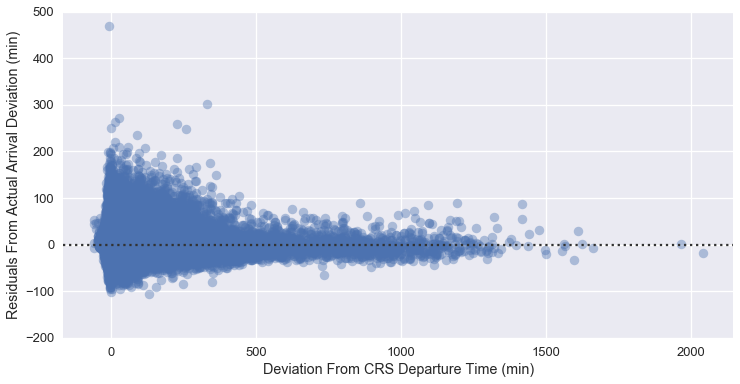

In [74]:
#plot the residuals of the regression between departure and arrival deviation
fig, ax = plt.subplots(figsize=(12,6))
sns.residplot(flights.dep_deviation, flights.arr_deviation, ax=ax,
              scatter_kws={'alpha':.4, 's': 90})
ax.set(xlabel='Deviation From CRS Departure Time (min)',
       ylabel='Residuals From Actual Arrival Deviation (min)',
       ylim=(-200,500))

<div class="span5 alert alert-success">
<p>The residuals between departure and arrival deviation are in a random pattern, supporting the use of a linear model</p>
</div>

Text(0.27,1,'Regression Model for Departure and Arrival Deviation By Date')

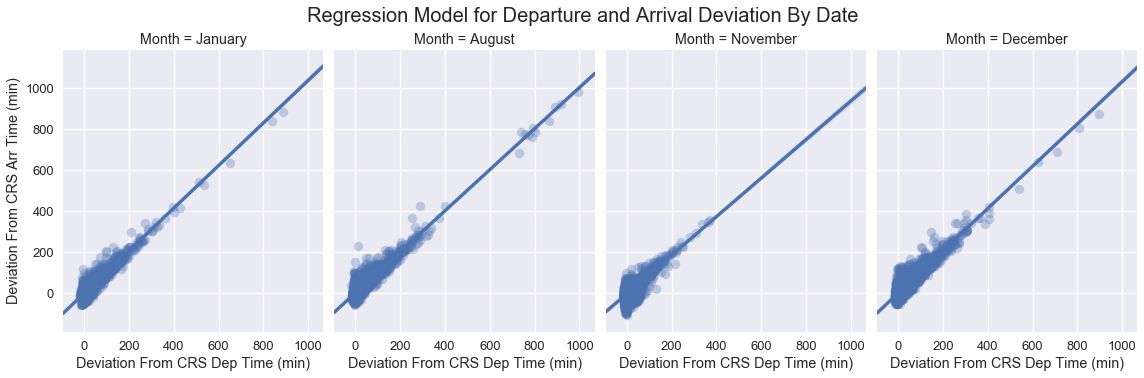

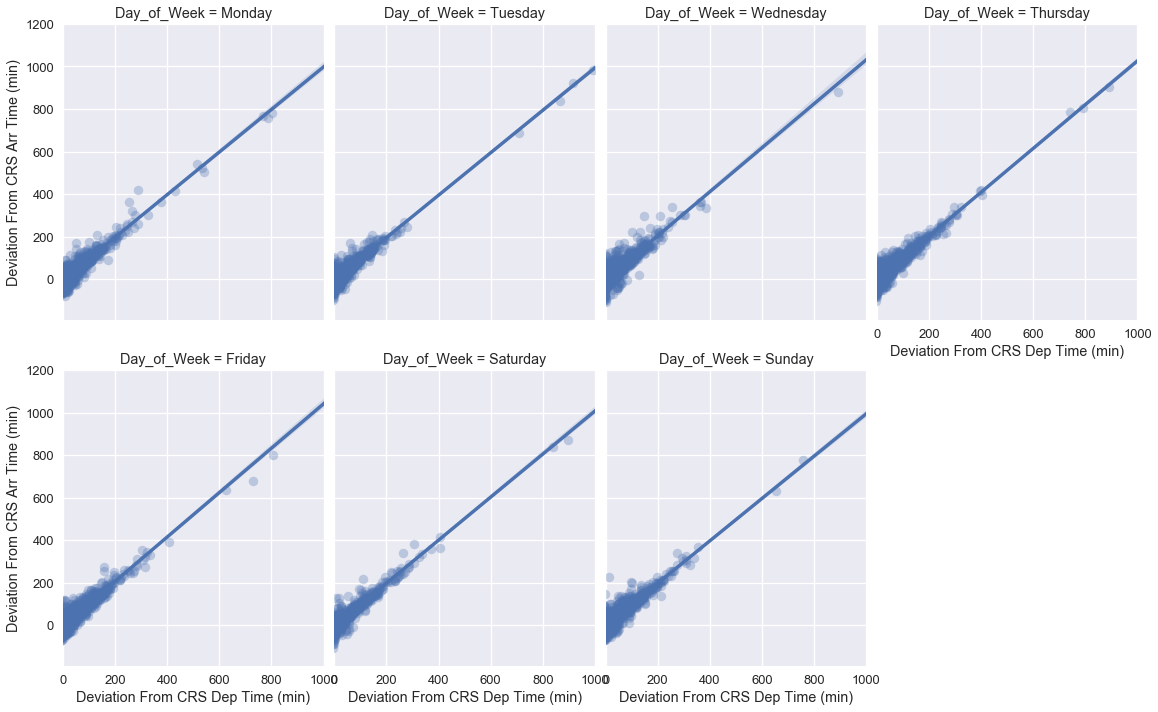

In [57]:
#define function for getting list and dataframe slice of top n values in column
def top_nvals(series, data, size):
    ntop_counts = series.value_counts()
    ntop_lst = ntop_counts.nlargest(size).index.tolist()
    ntop_df = data.loc[series.isin(ntop_counts[:size].index.tolist())]
    return ntop_lst, ntop_df

#unpack dataframe and list of top 5 links
top5_links, top5links_df = top_nvals(flights.link, flights, 5)

#plot dep and arr deviation by month
g1 = sns.lmplot(x='dep_deviation', y='arr_deviation', col='Month', col_wrap=4, aspect=.8,
                col_order=['January', 'August', 'November', 'December'], data=top5links_df,
                palette='Paired', scatter_kws={'alpha': .3, 's': 90})
g1.set_axis_labels('Deviation From CRS Dep Time (min)', 'Deviation From CRS Arr Time (min)')

#plot dep and arr deviation by day of week
g = sns.lmplot(x='dep_deviation', y='arr_deviation', col='Day_of_Week', aspect=.8,
              col_wrap=4, col_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
              palette='Paired', data=top5links_df, scatter_kws={'alpha': .3, 's':90})
g.set(xlim=(0,1000))
g.set_axis_labels('Deviation From CRS Dep Time (min)', 'Deviation From CRS Arr Time (min)')
g1.fig.text(0.27, 1, 'Regression Model for Departure and Arrival Deviation By Date', fontsize=20)

<div class="span5 alert alert-success">
<p>A Regression Analysis showed that in each categorical date value, deviation from CRS departure and arrival time shared a positive correlation </p>
</div>

##### Difference of departure and arrival deviation means

<div class="span5 alert alert-success">
<p>**Hypothesis Test**</p>
<p>Ho : $\mu_{d}$ = $\mu_{a}$  </p>
<p>Ha : $\mu_{d}$ $\neq$ $\mu_{a}$ </p>
</div>

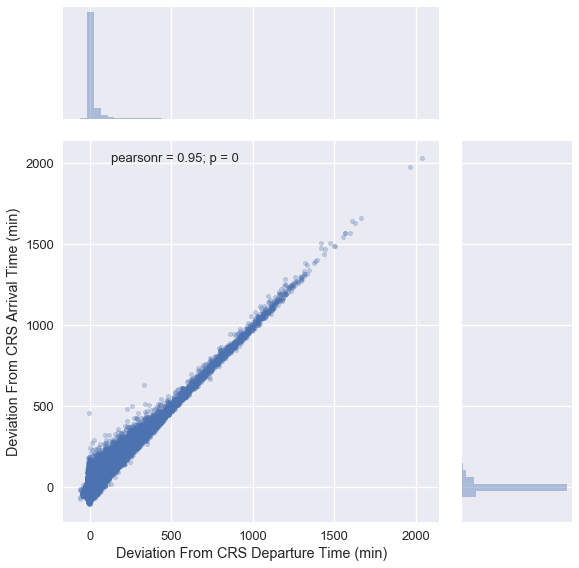

In [52]:
#display distribution and pearsonr for departure and arrival
g = sns.jointplot(x='dep_deviation', y='arr_deviation', data=flights, 
                   size=8, ratio=3, kind="scatter", joint_kws={'alpha':0.3,'s': 20})
g.set_axis_labels("Deviation From CRS Departure Time (min)", 
                  "Deviation From CRS Arrival Time (min)")

In [75]:
#define function to calculate an independent samples ttest 
def ttest_of_means(series1, name1, series2, name2):
    sem = round(np.sqrt(((series1.std() ** 2) / len(series1)) + 
                        ((series2.std() ** 2) / len(series2))), 3)
    dom = round(np.abs(np.mean(series1) - np.mean(series2)), 3)
    print('Margin of Error: ', sem)
    print('Difference of Means: ', dom)
    print(name1,' 95% Confidence Interval: ', np.percentile(series1,[2.5, 97.5]), 'min')
    print(name2,' 95% Confidence Interval: ', np.percentile(series2, [2.5, 97.5]), 'min')
    print('T-Test: tstat = %6.3f, P-value = %6.10f' % stats.ttest_ind(series2, series1))

#calculate significance of difference of means for departure and arrival deviation
ttest_of_means(flights.dep_deviation,'Departure Deviation',
               flights.arr_deviation, 'Arrival Deviation')

Margin of Error:  0.045
Difference of Means:  5.549
Departure Deviation  95% Confidence Interval:  [-11. 112.] min
Arrival Deviation  95% Confidence Interval:  [-31. 112.] min
T-Test: tstat = -124.015, P-value = 0.0000000000


<div class="span5 alert alert-success">
<p>With an alpha level of .01 ($\alpha$ = .01), the difference between the means of departure and arrival deviation from scheduled (CRS) time was statistically significant, p < .01</p>
</div>

##### Correlation between flight distance and arrival deviation

<div class="span5 alert alert-success">
<p>Ho : The correlation between the distance of a flight and arrival deviation is not significant</p>
<p>Ha : The correlation between the distance of a flight and arrival deviation is significant</p>
</div>

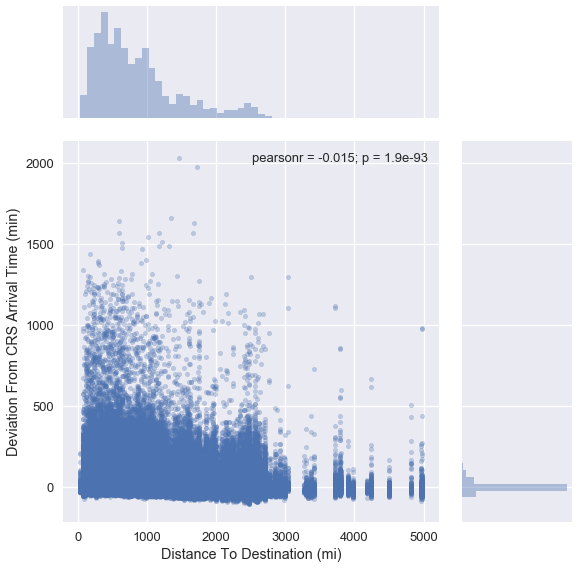

In [35]:
#display distribution and pearsonr for distance and arrival delay
g = sns.jointplot(x='distance', y='arr_deviation', data=flights, size=8,
                  ratio=3, kind="scatter", joint_kws={'alpha':0.3,'s': 20})
g.set_axis_labels("Distance To Destination (mi)",
                  "Deviation From CRS Arrival Time (min)")

In [50]:
#define function to test for signficance of a correlation
def pearsonr_perm_test(x, y, size):
    pearson_r = np.corrcoef(x,y)[0,1]
    perm_replicates = np.empty(size)
    for i in range(size):
        x_perm = np.random.permutation(x)
        perm_replicates[i] = np.corrcoef(x_perm, y)[0,1]
    p = np.sum(perm_replicates <= pearson_r) / len(perm_replicates)
    return pearson_r, p 

#show correlation coefficient and p-value
print('Pearson Correlation Coefficient: r = %6.3f, P-value = %6.8f' % 
      pearsonr_perm_test(flights.distance, flights.arr_deviation, 1000))

Pearson Correlation Coefficient: r = -0.015, P-value = 0.00000000


<div class="span5 alert alert-success">
<p>With an alpha level of .01 ($\alpha$ = .01), the correlation between flight distance and deviation from scheduled (CRS) arrival time is statistically significant, p < .01</p>
</div>